In [1]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'

In [2]:
import sys
from os import walk
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#natural language processing 
import nltk
from nltk.stem import PorterStemmer,SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#bs4
from bs4 import BeautifulSoup
#WordCloud 
from wordcloud import WordCloud 
#PythonImageLib
from PIL import Image 

In [3]:
stream = open(EXAMPLE_FILE, encoding = 'latin-1')
message = stream.read()
stream.close()
print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [4]:
stream = open(EXAMPLE_FILE, encoding = 'latin-1')

is_body = False

lines = []

for line in stream:
    
    if is_body: # I am checking if is_body is TRUE????????
        
        lines.append(line)
        
    elif line =='\n':
        
        is_body = True


stream.close()

In [5]:
lines

['\n',
 'Dear Mr Still\n',
 '\n',
 'Good tidings to you and all your staff for the festive season ahead (Christmas).\n',
 'Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa\'s Grotto" in your store.\n',
 'But WAIT! You\'re probably thinking: "What makes him so special?"\n',
 'Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.\n',
 'You will note also, from the enclosed sketch, that I have radically redesigned Santa\'s outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.\n',
 'I look forward to hearing from you.\n',
 '\n',
 'Best wishes\n'

In [6]:
email_body = '\n'.join(lines)
print(email_body)



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

In [7]:
SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_CAT = 1

In [8]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding='latin-1')

            is_body = False
            
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True

            stream.close()

            email_body = '\n'.join(lines)
            
            yield file_name, email_body 

In [9]:
def df_from_directory(path, classification):
    
        
    rows = []
    
    row_names = []
    
    
    
    for file_name, email_body in email_body_generator(path):
        
        
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
            
        row_names.append(file_name)
        
        
        
    return pd.DataFrame(rows, index=row_names)

In [10]:
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'

In [11]:
spam_emails = df_from_directory(SPAM_1_PATH, SPAM_CAT)

In [12]:
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, SPAM_CAT))

In [13]:
spam_emails

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01397.f75f0dd0dd923faefa3e9cc5ecb8c906,This is a multi-part message in MIME format.\n...,1
01398.8ca7045aae4184d56e8509dc5ad6d979,"Dear Subscriber,\n\n\n\nIf I could show you a ...",1
01399.2319643317e2c5193d574e40a71809c2,****Mid-Summer Customer Appreciation SALE!****...,1
01400.b444b69845db2fa0a4693ca04e6ac5c5,ATTN:SIR/MADAN \n\n\n\n ...,1


In [14]:
EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'
HAM_CAT = 0

In [15]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))

In [16]:
ham_emails

,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [17]:
data = pd.concat([spam_emails, ham_emails])
data

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1
...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0


In [18]:
data[data.MESSAGE.str.len()==0].index

Index(['cmds', 'cmds', 'cmds', '.yestee_antony.txt'], dtype='object')

In [19]:
print(data.index.get_loc('.yestee_antony.txt'))

4399


In [20]:
data[4397:4400]

,MESSAGE,CATEGORY
02500.05b3496ce7bca306bed0805425ec8621,"\n\nHi,\n\n\n\nI think you need to give us a l...",0
cmds,,0
.yestee_antony.txt,,0


In [21]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids
data

,MESSAGE,CATEGORY,DOC_ID
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4
...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5795
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5796
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5797
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5798


In [22]:
data['FILE_NAME'] = data.index 
data

,MESSAGE,CATEGORY,DOC_ID,FILE_NAME
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0,00001.7848dde101aa985090474a91ec93fcf0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1,00002.d94f1b97e48ed3b553b3508d116e6a09
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2,00003.2ee33bc6eacdb11f38d052c44819ba6c
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3,00004.eac8de8d759b7e74154f142194282724
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...,...
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5795,01396.61983fbe6ec43f55fd44e30fce24ffa6
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5796,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5797,01398.169b51731fe569f42169ae8f948ec676
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5798,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896


In [23]:
data.set_index('DOC_ID', inplace=True)

In [24]:
data

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5795,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5796,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5797,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


In [25]:
DATA_JSON_FILE = 'SpamData/01_Processing/email-text-data.json'
data.to_json(DATA_JSON_FILE)

In [26]:
data

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5795,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5796,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5797,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


In [27]:
data.CATEGORY.value_counts()

0    3902
1    1898
Name: CATEGORY, dtype: int64

In [28]:
amount_of_spam =data.CATEGORY.value_counts()[1]
amount_of_ham = data.CATEGORY.value_counts()[0]

In [29]:
amount_of_ham

3902

In [30]:
amount_of_spam

1898

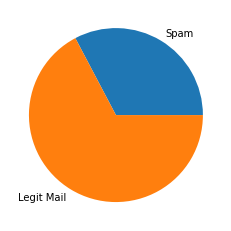

In [31]:
category_names = ['Spam', 'Legit Mail']

sizes = [amount_of_spam, amount_of_ham]

plt.pie(sizes, labels=category_names)

plt.show()

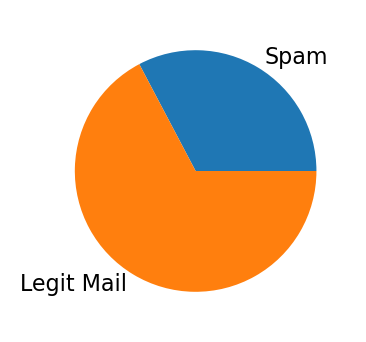

In [32]:
plt.figure(figsize=(2,2), dpi=200)

category_names = ['Spam', 'Legit Mail']

sizes = [amount_of_spam, amount_of_ham]

plt.pie(sizes, labels=category_names, textprops={'fontsize': 8})

plt.show()

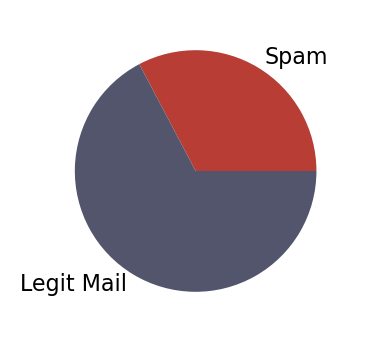

In [33]:
plt.figure(figsize=(2,2), dpi=200)

category_names = ['Spam', 'Legit Mail']

sizes = [amount_of_spam, amount_of_ham]

custom_colours = [ '#b83e35', '#52556b']

plt.pie(sizes, labels=category_names, textprops={'fontsize': 8}, colors=custom_colours)

plt.show()

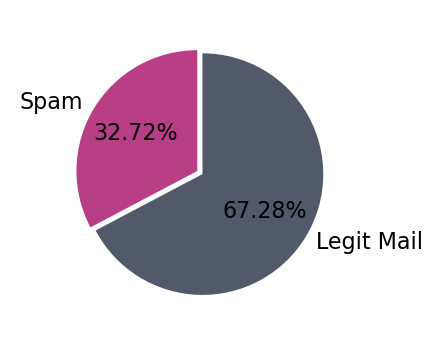

In [34]:
plt.figure(figsize=(2,2), dpi=200)

category_names = ['Spam', 'Legit Mail']

sizes = [amount_of_spam, amount_of_ham]

custom_colours = [ '#b83e85', '#52596b']

plt.pie(sizes, labels=category_names, textprops={'fontsize': 8},
        colors=custom_colours, startangle=90,
        explode=[0, 0.05],autopct='%1.2f%%' )

plt.show()

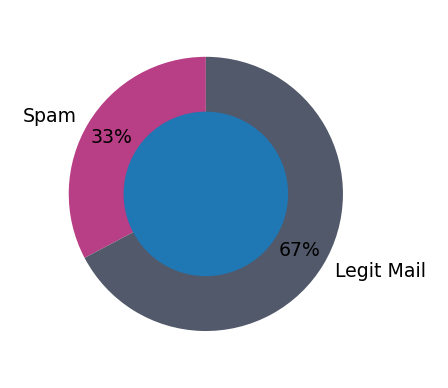

In [35]:
# A real good donut...

category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colours = [ '#b83e85', '#52596b']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8)


centre_circle = plt.Circle((0, 0), radius =0.6)
plt.gca().add_artist(centre_circle)




plt.show()

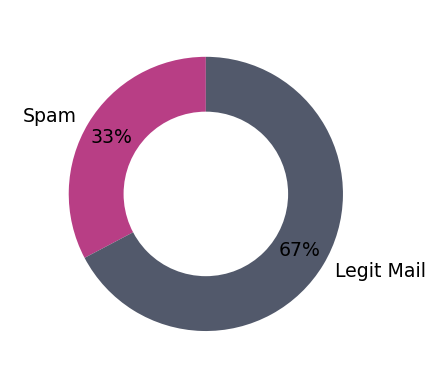

In [36]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colours = [ '#b83e85', '#52596b']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8)


centre_circle = plt.Circle((0, 0), radius =0.6, fc = 'white')
plt.gca().add_artist(centre_circle)




plt.show()

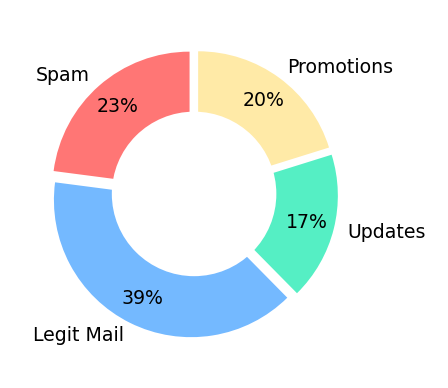

In [37]:
category_names = ['Spam', 'Legit Mail', 'Updates', 'Promotions']

sizes = [25, 43, 19, 22]

custom_colours = ['#ff7675', '#74b9ff', '#55efc4', '#ffeaa7']

offset = [0.05, 0.05, 0.05, 0.05]# Used to explode

plt.figure(figsize=(2, 2), dpi=227)

plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8, explode=offset)


centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')

plt.gca().add_artist(centre_circle)


plt.show()

In [38]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Call_me_Groot\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Call_me_Groot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Call_me_Groot\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\Call_me_Groot\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

In [39]:
stop_words= stopwords.words('english')

In [40]:
msg = 'All work and no play makes Jack a dull boy. or not to be. Nobody Playing expects the Spanish Inquisition! Fish Fishes '

In [41]:
words = word_tokenize(msg.lower())

stemmer = PorterStemmer()

#stemmer = SnowballStemmer('english')

filtered_words = [] 


for word in words:
    
    if word not in stop_words:
        
        stemmed_word = stemmer.stem(word)
        
        filtered_words.append(stemmed_word)
            
print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', '.', '.', 'nobodi', 'play', 'expect', 'spanish', 'inquisit', '!', 'fish', 'fish']


In [42]:
msg = 'All work and no play makes Jack a dull boy. To be or not to be.??? ;;@@***^^ Nobody expects the Spanish Inquisition!'

words = word_tokenize(msg.lower())

stemmer = SnowballStemmer('english')

filtered_words = []


for word in words:
    
    if word not in stop_words and word.isalpha():
        
        stemmed_word = stemmer.stem(word)
            
        filtered_words.append(stemmed_word)

print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'expect', 'spanish', 'inquisit']


In [43]:
data.at[5, 'MESSAGE']

'A POWERHOUSE GIFTING PROGRAM You Don\'t Want To Miss! \n\n \n\n  GET IN WITH THE FOUNDERS! \n\nThe MAJOR PLAYERS are on This ONE\n\nFor ONCE be where the PlayerS are\n\nThis is YOUR Private Invitation\n\n\n\nEXPERTS ARE CALLING THIS THE FASTEST WAY \n\nTO HUGE CASH FLOW EVER CONCEIVED\n\nLeverage $1,000 into $50,000 Over and Over Again\n\n\n\nTHE QUESTION HERE IS:\n\nYOU EITHER WANT TO BE WEALTHY \n\nOR YOU DON\'T!!!\n\nWHICH ONE ARE YOU?\n\nI am tossing you a financial lifeline and for your sake I \n\nHope you GRAB onto it and hold on tight For the Ride of youR life!\n\n\n\nTestimonials\n\n\n\nHear what average people are doing their first few days:\n\n\x93We\'ve received 8,000 in 1 day and we are doing that over and over again!\' Q.S. in AL\n\n \x93I\'m a single mother in FL and I\'ve received 12,000 in the last 4 days.\x94 D. S. in FL\n\n\x93I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!\x94 L.L. in KY\n\n\x93I didn\'t have the 

In [44]:
soup = BeautifulSoup(data.at[5, 'MESSAGE'], 'html.parser')
print(soup.prettify())

A POWERHOUSE GIFTING PROGRAM You Don't Want To Miss! 

 

  GET IN WITH THE FOUNDERS! 

The MAJOR PLAYERS are on This ONE

For ONCE be where the PlayerS are

This is YOUR Private Invitation



EXPERTS ARE CALLING THIS THE FASTEST WAY 

TO HUGE CASH FLOW EVER CONCEIVED

Leverage $1,000 into $50,000 Over and Over Again



THE QUESTION HERE IS:

YOU EITHER WANT TO BE WEALTHY 

OR YOU DON'T!!!

WHICH ONE ARE YOU?

I am tossing you a financial lifeline and for your sake I 

Hope you GRAB onto it and hold on tight For the Ride of youR life!



Testimonials



Hear what average people are doing their first few days:

We've received 8,000 in 1 day and we are doing that over and over again!' Q.S. in AL

 I'm a single mother in FL and I've received 12,000 in the last 4 days. D. S. in FL

I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day! L.L. in KY

I didn't have the money, so I found myself a partner to work this with. We have received $4,

In [45]:
def clean_message(message, stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    
    
    
    words = word_tokenize(message.lower())
    
    
    filtered_words = []
    
    
    
    for word in words:
        
        
        
        if word not in stop_words and word.isalpha():
            
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [46]:
print(email_body)



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

In [47]:
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [48]:
def clean_msg_no_html(message, stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    soup = BeautifulSoup(message, 'html.parser')
    
    cleaned_text = soup.get_text()
    
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    
    for word in words:
        
        
        
        if word not in stop_words and word.isalpha():
            
            filtered_words.append(stemmer.stem(word))

    return filtered_words 

In [49]:
clean_msg_no_html(data.at[2, 'MESSAGE'])

['fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'child',
 'support',
 'deserv',
 'free',
 'legal',
 'advic',
 'http',
 'join',
 'web',
 'fastest',
 'grow',
 'singl',
 'commun',
 'http',
 'start',
 'privat',
 'photo',
 'album',
 'onlin',
 'http',
 'wonder',
 'day',
 'offer',
 'manag',
 'prizemama',
 'wish',
 'leav',
 'list',
 'pleas',
 'use',
 'link',
 'http',
 'zzzz']

In [50]:
first_emails=data.MESSAGE.iloc[0:3]
first_emails

DOC_ID
0    <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
Name: MESSAGE, dtype: object

## pandas APPLY Function

In [51]:
my_nested_list=first_emails.apply(clean_message)
my_nested_list

DOC_ID
0    [doctyp, html, public, html, html, head, meta,...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
Name: MESSAGE, dtype: object

In [52]:
my_flat_list = []

for sublist in my_nested_list:
    for item in sublist:
        my_flat_list.append(item)
# print(my_flat_list)
print(len(my_flat_list))

321


In [53]:
## list comprehension
my_flat_list = [item for sublist in my_nested_list for item in sublist]
len(my_flat_list)

321

In [54]:
data

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d
...,...,...,...
5795,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5796,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5797,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676


In [55]:
nested_list = data.MESSAGE.apply(clean_msg_no_html)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [56]:
nested_list

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5795    [http, bizarr, collect, stuf, anim, could, fet...
5796    [care, use, one, also, realli, cute, thing, ja...
5797    [sm, skip, montanaro, write, jeremi, put, anot...
5798    [mark, hammond, like, given, zodb, sound, attr...
5799    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5800, dtype: object

In [57]:
number_of_processed_words_in_the_messages = []
for sublist in nested_list:
    for item in sublist:
        number_of_processed_words_in_the_messages.append(item)

In [58]:
print ( f'Total words Extracted from {len(nested_list)} mails: {len(number_of_processed_words_in_the_messages)}')

Total words Extracted from 5800 mails: 759560


In [59]:
data[data.CATEGORY == 1].shape

(1898, 3)

In [60]:
data[data.CATEGORY == 0].shape

(3902, 3)

In [61]:
doc_id_spam = data[data.CATEGORY == 1].index
doc_id_spam

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897],
           dtype='int64', name='DOC_ID', length=1898)

In [62]:
doc_id_ham = data[data.CATEGORY == 0].index
doc_id_ham

Int64Index([1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907,
            ...
            5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799],
           dtype='int64', name='DOC_ID', length=3902)

In [63]:
nested_list_ham=nested_list.loc[doc_id_ham]
nested_list_ham

DOC_ID
1898    [date, wed, aug, chri, garrigu, ca, reproduc, ...
1899    [martin, post, tasso, papadopoulo, greek, scul...
1900    [man, threaten, explos, moscow, thursday, augu...
1901    [klez, viru, wo, die, alreadi, prolif, viru, e...
1902    [ad, cream, spaghetti, carbonara, effect, past...
                              ...                        
5795    [http, bizarr, collect, stuf, anim, could, fet...
5796    [care, use, one, also, realli, cute, thing, ja...
5797    [sm, skip, montanaro, write, jeremi, put, anot...
5798    [mark, hammond, like, given, zodb, sound, attr...
5799    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 3902, dtype: object

In [64]:
nested_list_spam=nested_list.loc[doc_id_spam]
nested_list_spam

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
1893    [messag, mime, format, prefer, doctor, order, ...
1894    [dear, subscrib, could, show, way, get, visito...
1895    [custom, appreci, sale, express, appreci, loya...
1896    [attn, strictli, confidenti, pleas, introduc, ...
1897                                                   []
Name: MESSAGE, Length: 1898, dtype: object

In [65]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham)
normal_words

0              date
1               wed
2               aug
3              chri
4           garrigu
            ...    
442056    subscript
442057       inform
442058         list
442059     maintain
442060     listmast
Length: 442061, dtype: object

In [66]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam)
spammy_words

0              save
1              life
2             insur
3             spend
4              life
            ...    
317494    subscript
317495       inform
317496         list
317497     maintain
317498     listmast
Length: 317499, dtype: object

In [67]:
len(normal_words)+ len(spammy_words)

759560

In [68]:
flat_list_ham =[item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham).value_counts()
normal_words

http          7563
use           3633
list          2880
one           2373
get           2286
              ... 
pittsburgh       1
mattijsen        1
lawder           1
mattjisen        1
kimber           1
Length: 20815, dtype: int64

In [69]:
normal_words.shape[0] 

20815

In [70]:
flat_list_spam =[item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam).value_counts()
spammy_words 

http            3097
email           3090
free            2585
click           2058
receiv          1989
                ... 
intermediari       1
uruguay            1
chevi              1
seja               1
daysapprov         1
Length: 13242, dtype: int64

In [71]:
spammy_words.shape[0]

13242

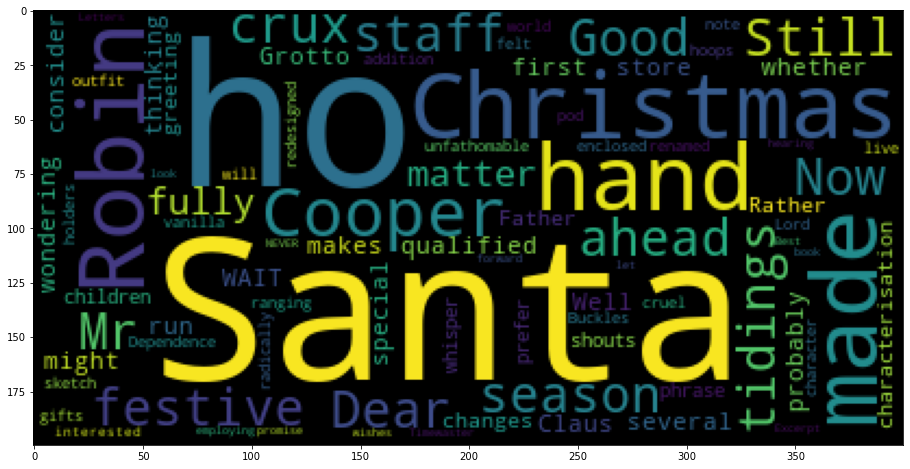

In [72]:
plt.figure(figsize=(18,8))
img = WordCloud().generate(email_body)
plt.imshow(img)
plt.show()

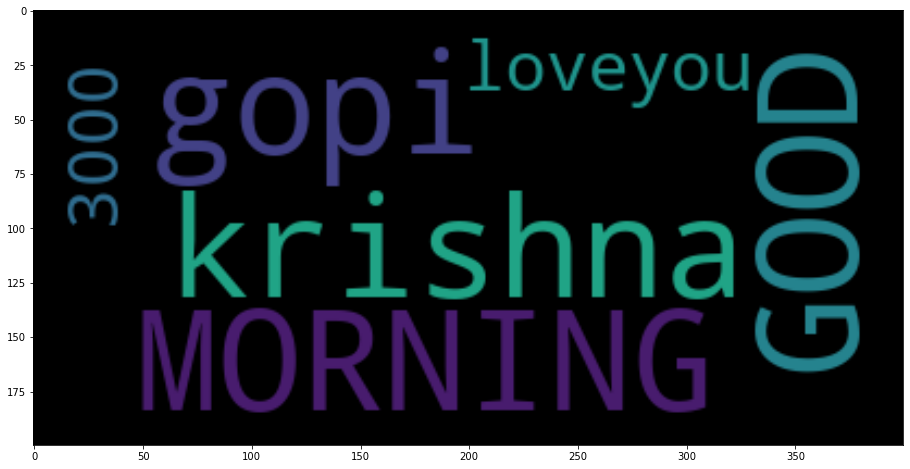

In [73]:
plt.figure(figsize=(18,8))
word_cloud = WordCloud(include_numbers= True).generate('gopi krishna ? GOOD MORNING...HOW ARE YOU ? loveyou 3000')
plt.imshow(word_cloud ,cmap='twilight_shifted',interpolation='bilinear')
plt.show()

In [74]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [75]:
txt = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
txt

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', ...]

In [76]:
novel = ' '.join(txt)

In [77]:
# novel

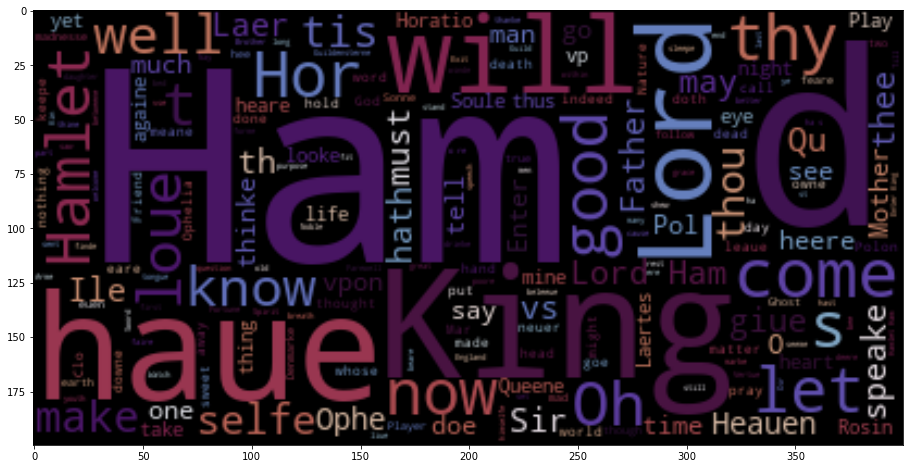

In [78]:
plt.figure(figsize=(18,8))

word_cloud = WordCloud( background_color='black', colormap='twilight_shifted').generate(novel)
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

In [79]:
WHALE='SpamData/01_Processing/wordcloud_resources/whale-icon.png'

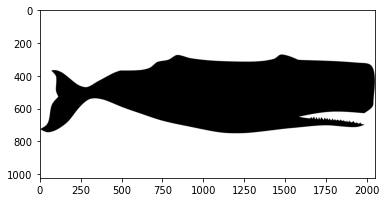

In [80]:
icon = Image.open(WHALE)
plt.imshow(icon)
plt.show()

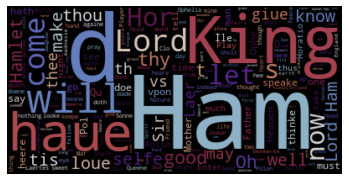

In [81]:
word_cloud.generate(novel)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

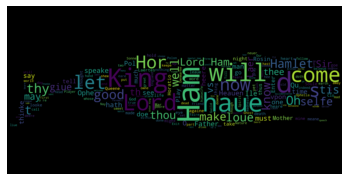

In [82]:
image_mask_1 = Image.new(mode='RGB', size=icon.size, color=(255, 255,255))
image_mask_1.paste(icon, box=icon)
rgb_array = np.array(image_mask_1)
word_cloud = WordCloud(mask=rgb_array)
word_cloud.generate(novel)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

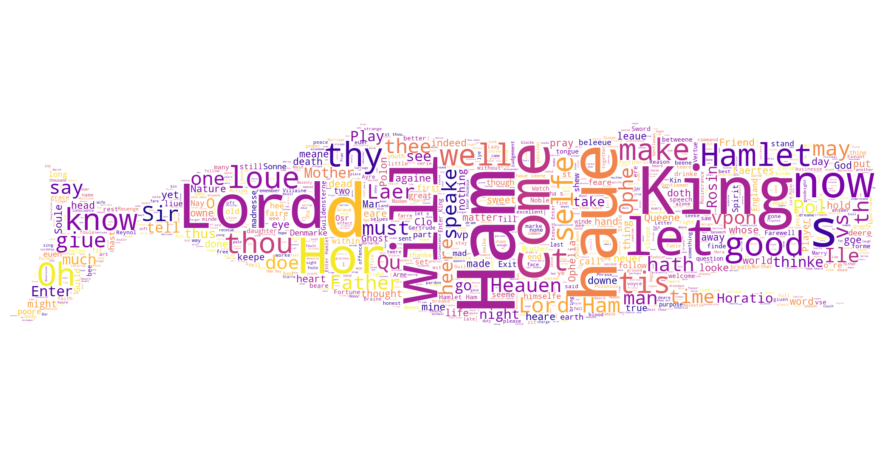

In [83]:
icon = Image.open(WHALE)

image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255)) 

image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=1000, colormap='plasma')

word_cloud.generate(novel)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [84]:
SKULL_FILE = 'SpamData/01_Processing/wordcloud_resources/skull-icon.png'
THUMBS_UP_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-up.png'
THUMBS_DOWN_FILE = 'SpamData/01_Processing/wordcloud_resources/thumbs-down.png'
CUSTOM_FONT_FILE = 'SpamData/01_Processing/wordcloud_resources/OpenSansCondensed-Bold.ttf'

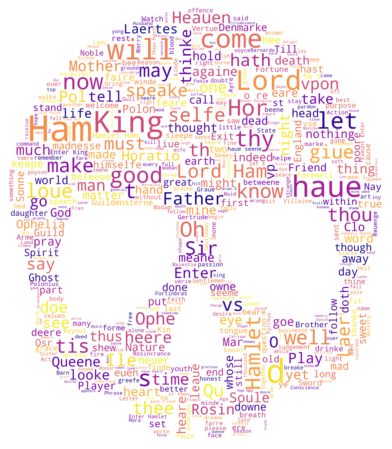

In [85]:
hamlet_corpus = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
hamlet_as_string = ' '.join(hamlet_corpus)
skull_icon = Image.open(SKULL_FILE)
image_mask = Image.new(mode='RGB', size=skull_icon.size, color=(255, 255, 255))
image_mask.paste(skull_icon, box=skull_icon)
rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask=rgb_array, background_color='white',
                      colormap='plasma' , max_words=500)

word_cloud.generate(hamlet_as_string)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

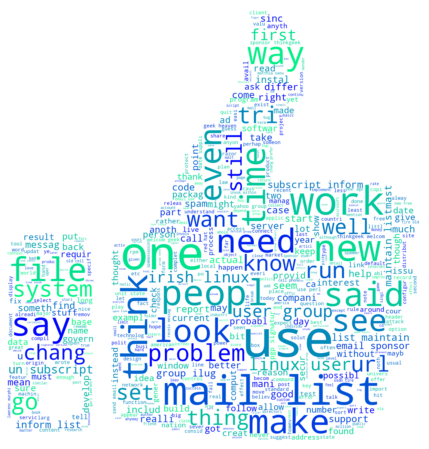

In [86]:
icon = Image.open(THUMBS_UP_FILE)

image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))

image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) 

ham_str = ' '.join(flat_list_ham)

word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=500, colormap='winter')
word_cloud.generate(ham_str)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

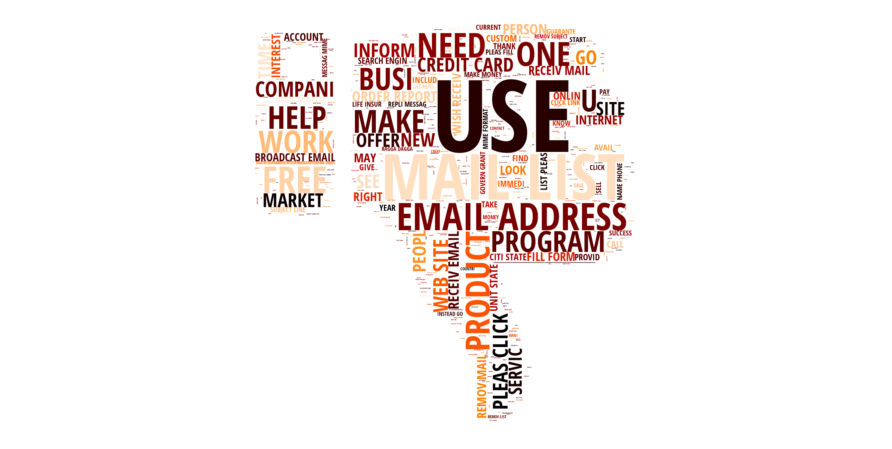

In [87]:
icon = Image.open(THUMBS_DOWN_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask)

spam_str = ' '.join(flat_list_spam)

word_cloud = WordCloud(mask=rgb_array, background_color='white', max_font_size=300,
                      max_words=500, colormap='gist_heat', font_path=CUSTOM_FONT_FILE, min_font_size=2)

word_cloud.generate(spam_str.upper())

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [88]:
stemmed_nested_list = data.MESSAGE.apply(clean_msg_no_html)
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]
len(flat_stemmed_list)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


759560

In [89]:
unique_words = pd.Series(flat_stemmed_list).value_counts()

In [90]:
unique_words 

http         10660
use           5019
list          4851
email         4367
get           4200
             ...  
willcom          1
perjur           1
ww               1
sstill           1
afirstcom        1
Length: 27334, dtype: int64

In [91]:
print('Nr of unique words', unique_words.shape[0])

Nr of unique words 27334


In [92]:
frequent_words = unique_words[0:2500] 
word_ids = list(range(0, 2500))
vocab=pd.DataFrame({'VOCAB_WORD': frequent_words.index.values})
vocab.index.name = 'WORD_ID'
vocab

,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,email
4,get
...,...
2495,quarter
2496,transit
2497,apach


In [93]:
WORD_ID_FILE = 'SpamData/01_Processing/word-by-id.csv'

In [94]:
vocab.to_csv(WORD_ID_FILE, index_label=vocab.index.name, header=vocab.VOCAB_WORD.name)

In [95]:
vocab.VOCAB_WORD == 'machine'

WORD_ID
0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Name: VOCAB_WORD, Length: 2500, dtype: bool

In [96]:
any(vocab.VOCAB_WORD == 'machine')

False

In [97]:
'machine'in set(vocab.VOCAB_WORD)

False

In [98]:
'fun'in set(vocab.VOCAB_WORD)

True

In [99]:
clean_email_lengths = [len(sublist) for sublist in stemmed_nested_list]
print('The Longest E Mail here is:   ', max(clean_email_lengths))

The Longest E Mail here is:    7671


In [100]:
np.argmax(clean_email_lengths)

5779

In [101]:
print(data.MESSAGE.at[5779]) # The message that is longest in the set of mails that we have

------------------------ Yahoo! Groups Sponsor ---------------------~-->

4 DVDs Free +s&p Join Now

http://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM

---------------------------------------------------------------------~->



A new version of unison is now available for testing.  It incorporates

several small improvements over 2.9.1, but the main change is a fix to

a bug that had potentially serious safety consequences, but only for

the very small number of users that are in the habit of running more

than one instance of Unison at a time, in parallel.  These users are

strongly encouraged to upgrade.  Others can wait if they wish.



The release includes pre-built executables for Linux and Solaris, but

not Windows.  (We are looking for a Unison-Windows maintainer -- at

the moment, none of the active developers are regularly using Unison

on Windows, and we do not have a machine that is configured properly

for building executables for export.)



Grab it from here:

   h

In [102]:
stemmed_nested_list

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5795    [http, bizarr, collect, stuf, anim, could, fet...
5796    [care, use, one, also, realli, cute, thing, ja...
5797    [sm, skip, montanaro, write, jeremi, put, anot...
5798    [mark, hammond, like, given, zodb, sound, attr...
5799    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5800, dtype: object

In [103]:
stemmed_nested_list_after_tolist = stemmed_nested_list.tolist()

In [104]:
word_columns_df =pd.DataFrame.from_records(stemmed_nested_list_after_tolist)

In [105]:
word_columns_df 

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,http,bizarr,collect,stuf,anim,could,fetch,sold,cornwal,museum,...,None,None,None,None,None,None,None,None,None,None
5796,care,use,one,also,realli,cute,thing,japanes,av,girl,...,None,None,None,None,None,None,None,None,None,None
5797,sm,skip,montanaro,write,jeremi,put,anoth,way,interest,hear,...,None,None,None,None,None,None,None,None,None,None
5798,mark,hammond,like,given,zodb,sound,attract,would,packag,hundr,...,None,None,None,None,None,None,None,None,None,None


In [106]:
word_columns_df.shape 

(5800, 7671)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(word_columns_df, data.CATEGORY,
                                                   test_size=0.3, random_state=42)

In [108]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
3378,sun,sep,vernon,webb,wrote,get,messag,sure,mean,anyon,...,None,None,None,None,None,None,None,None,None,None
5234,dave,long,write,also,strike,long,livestock,genet,engin,dumber,...,None,None,None,None,None,None,None,None,None,None
5268,messag,mime,format,comput,game,http,wednesday,juli,gmt,space,...,None,None,None,None,None,None,None,None,None,None
1293,creditfix,access,clear,bad,credit,onlin,directli,convieni,watch,credit,...,None,None,None,None,None,None,None,None,None,None
4358,timh,watch,last,night,could,help,wonder,one,gi,dexter,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,url,http,date,tue,sep,gmt,overwork,world,web,develop,...,None,None,None,None,None,None,None,None,None,None
5191,tue,aug,cdt,chri,garrigu,said,sequenc,defin,window,widen,...,None,None,None,None,None,None,None,None,None,None
5226,eugen,leitl,said,spammer,bother,keep,track,individu,whitelist,associ,...,None,None,None,None,None,None,None,None,None,None
5390,gari,murphi,intend,take,legal,violent,action,peopl,world,away,...,None,None,None,None,None,None,None,None,None,None


In [109]:
y_train

DOC_ID
3378    0
5234    0
5268    0
1293    1
4358    0
       ..
3772    0
5191    0
5226    0
5390    0
860     1
Name: CATEGORY, Length: 4060, dtype: int64

In [110]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
5412,eugen,leitl,write,sun,aug,gordon,mohr,wrote,outgo,mail,...,None,None,None,None,None,None,None,None,None,None
1103,webcredit,thank,email,address,obtain,ase,list,refer,wish,unsubscrib,...,None,None,None,None,None,None,None,None,None,None
812,hello,jm,growth,hormon,therapi,lose,weight,build,lean,muscl,...,None,None,None,None,None,None,None,None,None,None
1632,applic,grant,rememb,type,grant,never,need,repay,time,limit,...,None,None,None,None,None,None,None,None,None,None
1128,hey,like,tri,everyth,lose,weight,know,feel,special,diet,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,messag,sent,http,geeg,would,like,read,stori,http,titl,...,None,None,None,None,None,None,None,None,None,None
4889,list,administr,author,request,follow,mail,list,post,list,iiu,...,None,None,None,None,None,None,None,None,None,None
5124,messag,dimebox,hal,devor,write,wed,jul,chri,chri,garrigu,...,None,None,None,None,None,None,None,None,None,None
1338,u,r,last,chanc,u,r,incom,per,week,give,...,None,None,None,None,None,None,None,None,None,None


In [111]:
y_test

DOC_ID
5412    0
1103    1
812     1
1632    1
1128    1
       ..
2228    0
4889    0
5124    0
1338    1
2926    0
Name: CATEGORY, Length: 1740, dtype: int64

In [112]:
X_train.index.name = 'DOC_ID'
y_train.index.name = 'DOC_ID'
X_train.index.name = y_train.index.name = 'DOC_ID'

In [113]:
X_test.index.name=y_test.index.name='DOC_ID'

In [114]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
3378,sun,sep,vernon,webb,wrote,get,messag,sure,mean,anyon,...,None,None,None,None,None,None,None,None,None,None
5234,dave,long,write,also,strike,long,livestock,genet,engin,dumber,...,None,None,None,None,None,None,None,None,None,None
5268,messag,mime,format,comput,game,http,wednesday,juli,gmt,space,...,None,None,None,None,None,None,None,None,None,None
1293,creditfix,access,clear,bad,credit,onlin,directli,convieni,watch,credit,...,None,None,None,None,None,None,None,None,None,None
4358,timh,watch,last,night,could,help,wonder,one,gi,dexter,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,url,http,date,tue,sep,gmt,overwork,world,web,develop,...,None,None,None,None,None,None,None,None,None,None
5191,tue,aug,cdt,chri,garrigu,said,sequenc,defin,window,widen,...,None,None,None,None,None,None,None,None,None,None
5226,eugen,leitl,said,spammer,bother,keep,track,individu,whitelist,associ,...,None,None,None,None,None,None,None,None,None,None


In [115]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
5412,eugen,leitl,write,sun,aug,gordon,mohr,wrote,outgo,mail,...,None,None,None,None,None,None,None,None,None,None
1103,webcredit,thank,email,address,obtain,ase,list,refer,wish,unsubscrib,...,None,None,None,None,None,None,None,None,None,None
812,hello,jm,growth,hormon,therapi,lose,weight,build,lean,muscl,...,None,None,None,None,None,None,None,None,None,None
1632,applic,grant,rememb,type,grant,never,need,repay,time,limit,...,None,None,None,None,None,None,None,None,None,None
1128,hey,like,tri,everyth,lose,weight,know,feel,special,diet,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,messag,sent,http,geeg,would,like,read,stori,http,titl,...,None,None,None,None,None,None,None,None,None,None
4889,list,administr,author,request,follow,mail,list,post,list,iiu,...,None,None,None,None,None,None,None,None,None,None
5124,messag,dimebox,hal,devor,write,wed,jul,chri,chri,garrigu,...,None,None,None,None,None,None,None,None,None,None


In [116]:
y_train

DOC_ID
3378    0
5234    0
5268    0
1293    1
4358    0
       ..
3772    0
5191    0
5226    0
5390    0
860     1
Name: CATEGORY, Length: 4060, dtype: int64

In [117]:
y_test

DOC_ID
5412    0
1103    1
812     1
1632    1
1128    1
       ..
2228    0
4889    0
5124    0
1338    1
2926    0
Name: CATEGORY, Length: 1740, dtype: int64

In [118]:
vocab

,VOCAB_WORD
WORD_ID,
0,http
1,use
2,list
3,email
4,get
...,...
2495,quarter
2496,transit
2497,apach


In [119]:
vocab.at[0, 'VOCAB_WORD']

'http'

In [120]:
vocab.at[2499, 'VOCAB_WORD']

'cpu'

In [121]:
# EE
#vocab.get_loc('http')

In [122]:
word_index = pd.Index(vocab.VOCAB_WORD)

In [123]:
type(word_index)

pandas.core.indexes.base.Index

In [124]:
word_index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'milter', 'telecommun', 'boom', 'mutual', 'zone', 'quarter', 'transit',
       'apach', 'fake', 'cpu'],
      dtype='object', name='VOCAB_WORD', length=2500)

In [125]:
word_index.get_loc('http')

0

In [126]:
word_index.get_loc('layer')

2485

In [127]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
3378,sun,sep,vernon,webb,wrote,get,messag,sure,mean,anyon,...,None,None,None,None,None,None,None,None,None,None
5234,dave,long,write,also,strike,long,livestock,genet,engin,dumber,...,None,None,None,None,None,None,None,None,None,None
5268,messag,mime,format,comput,game,http,wednesday,juli,gmt,space,...,None,None,None,None,None,None,None,None,None,None
1293,creditfix,access,clear,bad,credit,onlin,directli,convieni,watch,credit,...,None,None,None,None,None,None,None,None,None,None
4358,timh,watch,last,night,could,help,wonder,one,gi,dexter,...,None,None,None,None,None,None,None,None,None,None


In [128]:
y_train.head()

DOC_ID
3378    0
5234    0
5268    0
1293    1
4358    0
Name: CATEGORY, dtype: int64

In [129]:
X_train.index[0],X_train.index[0],X_train.index[0]

(3378, 3378, 3378)

In [130]:
word_index.get_loc('ye'), word_index.get_loc('inde'), word_index.get_loc('agent')

(265, 1239, 503)

In [131]:
y_train[3378], y_train[3378], y_train[3378]

(0, 0, 0)

In [132]:
my_sample_dict = {'DOC_ID' : [4844, 4844, 4844], 'LABEL' : [0, 0, 0], 'OCCURENCE' : [1,1,1], 'WORD_ID' :[266, 1259, 508] }

In [133]:
my_sample_dict_df = pd.DataFrame.from_dict(my_sample_dict)
my_sample_dict_df

,DOC_ID,LABEL,OCCURENCE,WORD_ID
0,4844,0,1,266
1,4844,0,1,1259
2,4844,0,1,508


In [134]:
# Function....df, word_index, labels

def make_sparse_matrix(df, indexed_words, labels):
    
    
    
    nr_rows = df.shape[0]
    
    nr_cols = df.shape[1]
    
    word_set = set(indexed_words)
    
    dict_list = []
    
    
    for i in range(nr_rows):
        
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            
            if word in word_set:
                
                doc_id = df.index[i]
                
                word_id = indexed_words.get_loc(word)
            
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
                
                
    
    return pd.DataFrame(dict_list)

In [ ]:
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)
sparse_train_df

In [ ]:
train_grouped = sparse_train_df.groupby(['DOC_ID', 'WORD_ID','LABEL' ]).sum()
train_grouped 

In [ ]:
train_grouped = train_grouped.reset_index()
train_grouped

In [ ]:
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)
sparse_test_df

In [ ]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID','LABEL' ]).sum().reset_index()
test_grouped 

In [ ]:
TRAINING_DATA_FILE = 'SpamData/02_Training/train-data.txt'
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')

In [ ]:
TEST_DATA_FILE = 'SpamData/02_Training/test-data.txt'
np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%d')

In [ ]:
test_grouped.shape

In [ ]:
train_grouped.shape

In [ ]:
train_doc_ids = set(train_grouped.DOC_ID)
test_doc_ids = set(test_grouped.DOC_ID)

In [ ]:
len(X_train) - len(train_doc_ids)

In [ ]:
len(X_test) - len(test_doc_ids)

In [ ]:
X_test.index

In [ ]:
set(X_test.index.values)

In [ ]:
set(X_test.index.values) - test_doc_ids

In [ ]:
data.MESSAGE[134]

In [ ]:
clean_msg_no_html(data.at[134, 'MESSAGE'])

In [ ]:
data.loc[274] 

In [ ]:
file_number_275 ='F:/py/DSP11/SpamData/01_Processing/spam_assassin_corpus/spam_1/00275.4675c4cce2bf27adaafeef693d562f8b'

In [ ]:
file_number_275_stream = open(file_number_275)
message_275 = file_number_275_stream.read()
print(message_275)

In [ ]:
file_number_275_stream.close()
clean_msg_no_html(data.at[274, 'MESSAGE'])